##  Phase portraits in Python


In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint

### phase plane plots via quiver
We are going to plot phase diagrams for linear ODEs that have the form

$$
dx/dt = a*x + b*y \\
dy/dt = c*x + d*y
$$

Python's `ax.quiver()` function allows displays vectors with arrows made of the components $(u,v)$, which is exactly what we need. The function takes 4 inputs $(x,y,u,v)$: $x$ and $y$ are the grid points and $u$ and $v$ are the $u$ and $v$ components of the vector, which are given by our ODEs. 

In order to make the grid points $(x,y)$, we will use the function `np.meshgrid()`. It's a pretty handy function that takes as input a range of $x$ and $y$ values and returns two matrices $x$, $y$ that together give us the grid points. Here is the code to produce a grid with an $x$ and $y$ range from (-1.5, 1.5) with a spacing of 0.2, we could do the following:

In [2]:
xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X,Y) #create a grid

Define the arrays dx and dy based on the ODE in order to compute the flow vectors on that grid. Here is a linear example:

In [3]:
a = -2
b = 1
c = 1
d = 0
dx = a*x+b*y #overwrites the other dx
dy = c*x+d*y #overwrites the other dy

Then plot the arrows given by arrays dx,dy at points x,y:

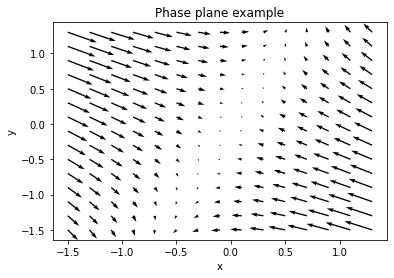

In [4]:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase plane example')
plt.show()

### ODE solutions using odeint
Python has an entire suite of ode solvers. We'll use the function `odeint`, with documentation provided here: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html>

This requires defining a function `fun` that sets the two functions for the two-variable ODE, to be called by the `odeint`, together with parameter values a, b, c, d. There are many other options that you can read about in the documentation page. Here is the sample code:

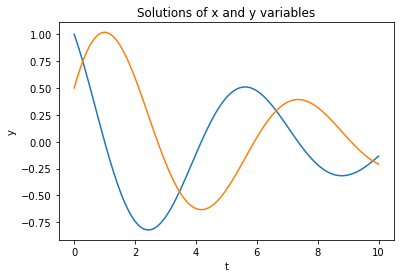

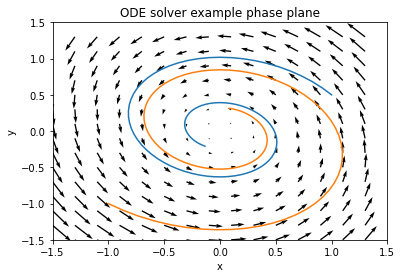

In [5]:
xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

a = -0.3
b = -1
c = 1
d = 0

dx = a*x+b*y
dy = c*x+d*y

# define the function for the ODES: note the order of inputs 
def fun(xy, t, a, b, c, d):  # inputs are: variable array, time, any parameters
    newxy = [a*xy[0]+b*xy[1], c*xy[0]+d*xy[1]]
    return newxy

# Set the initial values, the vector of times, and call the ODE solver
init = [1, 0.5] #[intial x, initial y]
t = np.linspace(0, 10, 101) # create time vector 
sol = odeint(fun, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun

# Plot the solutions over time
plt.plot(t, sol)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solutions of x and y variables')
plt.show()

    
# plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax.plot(sol[:,0], sol[:,1]) # plot the x and the y variable in the phase plane

# Set different initial values, the vector of times, and call the ODE solver again
init = [-1, -1] #[intial x, initial y]
t = np.linspace(0, 10, 101) # create time vector 
sol = odeint(fun, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun

ax.plot(sol[:,0], sol[:,1]) # plot the x and the y variable in the phase plane
plt.xlabel('x') #use more informative labels for a real model
plt.ylabel('y')
plt.title('ODE solver example phase plane')
plt.show()